In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decorded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

565248/550378 [==============================] - 0s 0us/step


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
# ラベルを one-hot encoding する
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = keras.Sequential([layers.Dense(64, activation="relu"),
                          layers.Dense(64, activation="relu"),
                          layers.Dense(46, activation="softmax")])

In [10]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [12]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 58ms/step - loss: 2.8754 - accuracy: 0.5490 - val_loss: 1.8585 - val_accuracy: 0.6630
Epoch 2/20
16/16 [==============================] - 1s 43ms/step - loss: 1.4686 - accuracy: 0.7205 - val_loss: 1.3351 - val_accuracy: 0.7280
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0509 - accuracy: 0.7881 - val_loss: 1.1259 - val_accuracy: 0.7680
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8247 - accuracy: 0.8265 - val_loss: 1.0333 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6610 - accuracy: 0.8624 - val_loss: 0.9882 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5299 - accuracy: 0.8906 - val_loss: 0.9349 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4256 - accuracy: 0.9103 - val_loss: 0.9789 - val_accuracy: 0.8060
Epoch 8/20
16

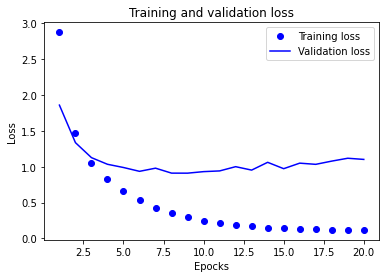

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
# bo -> blue dot
plt.plot(epochs, loss_values, "bo", label="Training loss")
# b -> solid blue line
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epocks")
plt.ylabel("Loss")
plt.legend()
plt.show()

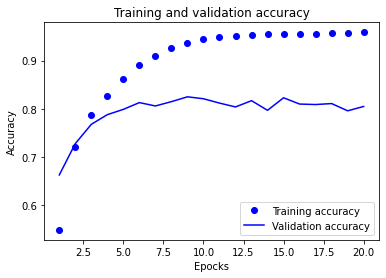

In [14]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(acc) + 1)
# bo -> blue dot
plt.plot(epochs, acc, "bo", label="Training accuracy")
# b -> solid blue line
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epocks")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
predictions = model.predict(x_test)

In [16]:
predictions[0].shape

(46,)

In [17]:
np.sum(predictions[0])

0.99999994